In [25]:
# import packages
import tensorflow as tf
from tensorflow.python.client import device_lib
# LIST GPUS AVAILABLE
print(device_lib.list_local_devices())
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import pickle

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16708659577800878247
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5717884928
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4993945707871231224
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


In [26]:
## load the data set stored in pickle format 
with open("dataset/images_3000_160.p", 'rb') as f:
    images = pickle.load(f)

with open("dataset/labels_3000_160.p","rb") as f:
    labels = pickle.load(f)

print("Type of images : ", type(images))
print("Type of single image : ", type(images[0]))

Type of images :  <class 'list'>
Type of single image :  <class 'numpy.ndarray'>


Text(0.5, 1.0, 'Label')

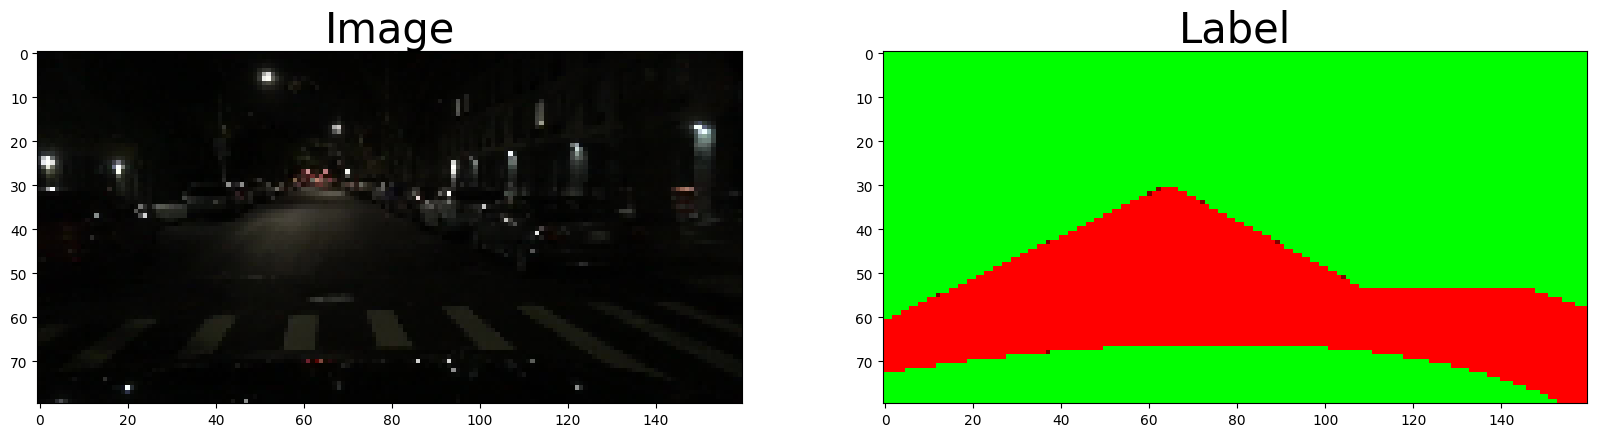

In [220]:
# Display a random image
import random
index = random.randint(0,len(labels))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(images[index].squeeze())
ax1.set_title('Image', fontsize=30)
ax2.imshow(labels[index].squeeze())
ax2.set_title('Label', fontsize=30)

### Resize the Images and Labels

In [68]:
from tqdm import tqdm

### Start Resizing 
resize_images = []
resize_labels = []

def resize_and_pad(in_img):
    out_img = cv2.resize(in_img, (128, 80)) # width, height
    out_img = cv2.copyMakeBorder(out_img, 24, 24, 0, 0, 0)

    return out_img


In [ ]:

for i in tqdm(range(len(images))):
    #out_img = tf.image.resize_with_pad(images[i], 128, 128)
    #out_label = tf.image.resize_with_pad(labels[i], 128, 128)

    out_img = cv2.resize(images[i], (128, 80)) # width, height
    out_img = cv2.copyMakeBorder(out_img, 24, 24, 0, 0, 0)
    out_label = cv2.resize(labels[i], (128, 80)) # width, height
    out_label = cv2.copyMakeBorder(out_label, 24, 24, 0, 0, 0)

    resize_images.append(out_img)
    resize_labels.append(out_label)

In [46]:
# Changing the labels black background to gree background
mod_resize_labels = []
for lab in resize_labels:
    for x in range(lab.shape[0]):
        for y in range(lab.shape[1]):
            if (np.all(lab[x][y]==[0,0,0])):
                lab[x][y]=[0,1,0]
    mod_resize_labels.append(lab)

# Save resized files to pickle
resize_img_filenmae = "dataset/drive_img_256.p"
resize_lbl_filenmae = "dataset/drive_lbl_256.p"

with open (resize_img_filenmae, 'wb') as f:
    pickle.dump(resize_images, f)

with open(resize_lbl_filenmae, 'wb') as f:
    pickle.dump(new_resize_labels, f)

Text(0.5, 1.0, 'Label')

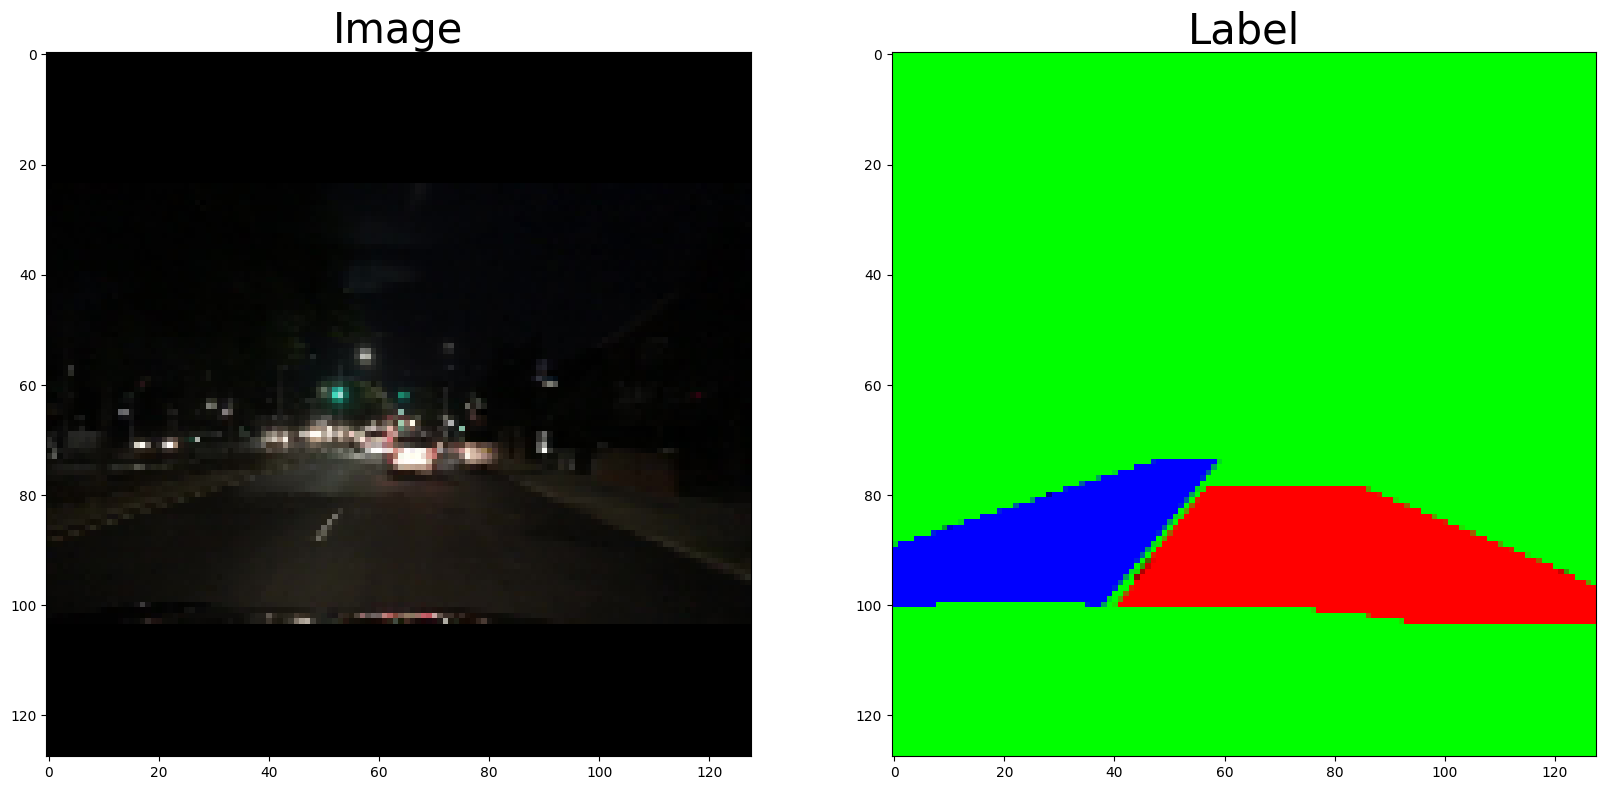

In [50]:
# Display a random image
import random
index = random.randint(0,len(labels))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(resize_images[index].squeeze())
ax1.set_title('Image', fontsize=30)
ax2.imshow(mod_resize_labels[index].squeeze())
ax2.set_title('Label', fontsize=30)

In [51]:
# Perform data augmentation here
import tensorflow as tf
from tqdm import tqdm

def tf_aug(in_img, in_label):
    img_ten = tf.convert_to_tensor(in_img)
    img_bri = tf.image.random_brightness(img_ten, 0.2)
    return img_bri.numpy()

def flip(in_img, in_label):
    out_img = cv2.flip(in_img, 1)
    out_label = cv2.flip(in_label, 1)
    # out_img = tf.image.flip_left_right(in_img)
    # out_label = tf.image.flip_left_right(in_label)
    return out_img, out_label

aug_images = []
aug_labels = []

for i in tqdm(range(len(images))):
    out_img, out_label = flip(resize_images[i], mod_resize_labels[i])
    aug_images.append(out_img)
    aug_labels.append(out_label)


# Extending the current bucket of images and lables
resize_images.extend(aug_images)
mod_resize_labels.extend(aug_labels)
print("len of images after augmentation : ", len(resize_images))
print("len of labels after augmentation : ", len(mod_resize_labels))

100%|██████████| 3000/3000 [00:02<00:00, 1163.34it/s]

len of images after augmentation :  6000
len of labels after augmentation :  6000


### Check the Image After Resize and Augmentation 

Text(0.5, 1.0, 'Label')

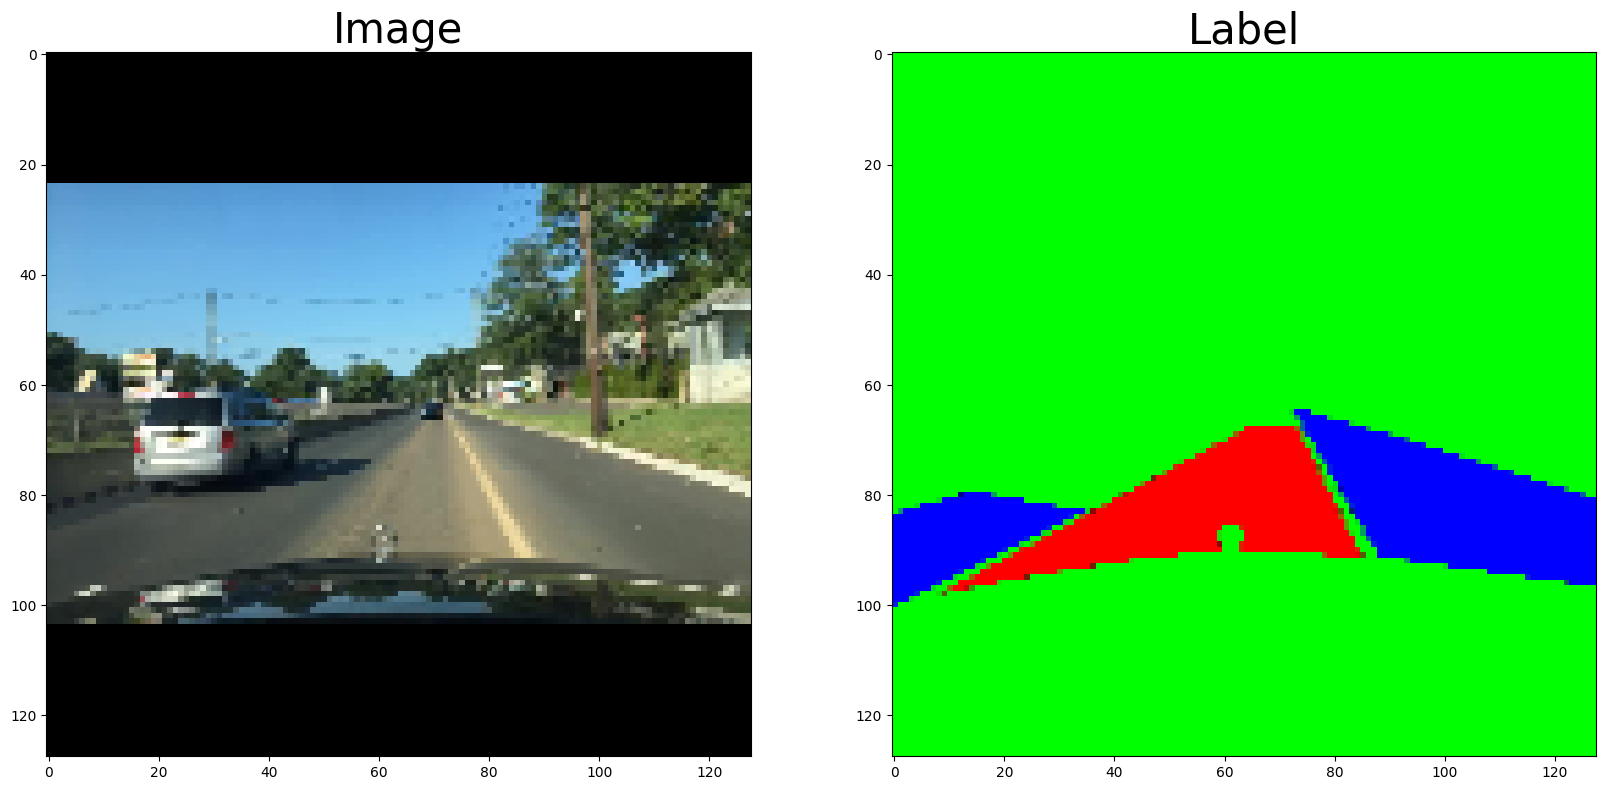

In [54]:
# Display a random image
import random
index = random.randint(0,len(labels))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(resize_images[index].squeeze())
ax1.set_title('Image', fontsize=30)
ax2.imshow(mod_resize_labels[index].squeeze())
ax2.set_title('Label', fontsize=30)


In [55]:
## Import Packages
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [56]:
## SPLIT THE DATASET
# convert to array
images_array = np.array(resize_images)
labels_array = np.array(mod_resize_labels)

X_train, X_val, Y_train, Y_val = train_test_split(images_array, labels_array, test_size=0.20, random_state=40)
print(type(X_train))
# print(X_train)
print(len(X_train))
print(X_train[0].shape)

print(type(Y_train))
# print(Y_train)
print(Y_train[0].shape)

print(type(Y_val))
# print(Y_val)
print(Y_val[0].shape)

<class 'numpy.ndarray'>
4800
(128, 128, 3)
<class 'numpy.ndarray'>
(128, 128, 3)
<class 'numpy.ndarray'>
(128, 128, 3)


### Possibles models can be tried
Simple Encoder-Decoder, Unet, FCN, SegNet, DeepLabV3, PSPNet, Pantopic FPN, Pantopic Deeplab

In [57]:
# imports for Model
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, UpSampling2D, add, Conv2DTranspose, Dropout, Activation, SeparableConv2D, ReLU
from tensorflow.keras import Model, Input

In [58]:
# Parameters for model
model_in_rows = 80
model_in_cols = 160
model_in_channels = 3
model_in_size = [model_in_rows, model_in_cols, model_in_channels]
mobnet_shape = [224, 224, 3]
mobnet_shape2 = [128, 128, 3]
model_in_size2 = [96, 192, 3]

In [189]:
# Model definition
base_model = tf.keras.applications.MobileNetV2(input_shape = mobnet_shape2, include_top = False)
# tf.keras.utils.plot_model(base_model, "mobileNetV2_model_80_160.png", show_shapes=True)

layer_names = ['block_1_expand_relu',
                'block_3_expand_relu',
                'block_6_expand_relu',
                'block_13_expand_relu',
                'block_16_project']

base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

def upsample (filters, size, name):
    return tf.keras.Sequential([
        Conv2DTranspose(filters, size, strides=2, padding='same'),
        BatchNormalization(),
        Dropout(0.5),
        ReLU()
    ])

down_stack = tf.keras.Model(inputs= base_model.input, 
                            outputs = base_model_outputs,
                            name='pretrained_mobilenet')

down_stack.trainable = True #True gives better performance

up_stack = [upsample(512, 3, 'upsample_4*4_to_8*8'),
            upsample(256, 3, 'upsample_8*8_to_16*16'),
            upsample(128, 3, 'upsample_16*16_to_32*32'),
            upsample(64, 3, 'upsample_32*32_to_64*64')]

def unet_model3(model_in_shape, output_channel):

    inputs = Input(shape=model_in_shape)
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])
    
    # concatenating
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

    # last layer of the model
    output = Conv2DTranspose(output_channel, 3, strides=2, padding='same', activation='softmax')(x)
    
    return Model(inputs=inputs, outputs=output)


model = unet_model3(mobnet_shape2, 3)
# model.load_weights('MobnET_weight_trainable_011023_batchNorm_skip.h5')

### Training Part

In [190]:
# Parameters
batch_size = 16
epochs = 20
pool_size = 2
lr = 0.0001
steps_per_epoch = len(X_train)/batch_size
input_shape = X_train[0].shape

In [209]:
# Using a generator to help the model use less data
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val)).batch(batch_size)

# Compiling and training the model
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=lr, amsgrad=False, name="Adam"), loss='categorical_crossentropy')

history = model.fit( 
  train_dataset, 
  validation_data= val_dataset,
  batch_size=batch_size, 
  steps_per_epoch=steps_per_epoch, 
  epochs=epochs, verbose=1)

model.save('MobnET_weight_trainable_071023_batchNorm_skip.h5')
# model.load_weights('MobnET_weight_trainable_011023_batchNorm_skip.h5')

Epoch 1/20
300/300 [==============================] - 15s 45ms/step - loss: 0.1611 - val_loss: 0.1690
Epoch 2/20
300/300 [==============================] - 13s 42ms/step - loss: 0.1602 - val_loss: 0.1686
Epoch 3/20
300/300 [==============================] - 13s 43ms/step - loss: 0.1596 - val_loss: 0.1686
Epoch 4/20
300/300 [==============================] - 13s 44ms/step - loss: 0.1590 - val_loss: 0.1684
Epoch 5/20
300/300 [==============================] - 14s 46ms/step - loss: 0.1582 - val_loss: 0.1687
Epoch 6/20
300/300 [==============================] - 13s 45ms/step - loss: 0.1576 - val_loss: 0.1690
Epoch 7/20
300/300 [==============================] - 14s 45ms/step - loss: 0.1572 - val_loss: 0.1689
Epoch 8/20
300/300 [==============================] - 13s 45ms/step - loss: 0.1561 - val_loss: 0.1682
Epoch 9/20
300/300 [==============================] - 13s 44ms/step - loss: 0.1555 - val_loss: 0.1684
Epoch 10/20
300/300 [==============================] - 13s 44ms/step - loss: 0.154

dict_keys(['loss', 'val_loss'])


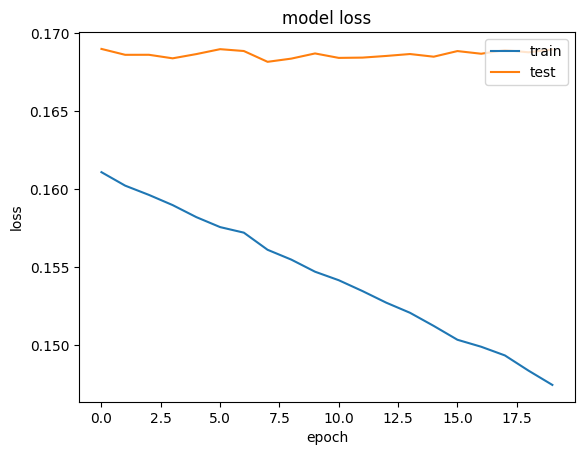

In [210]:
# Plot the training result
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Inferance Part

In [211]:
def rgb_channel(img, thresholding=False, thresh=230):
    """Threshold the re-drawn images
    Returns R, G, B channels"""
    image = np.copy(img)*255
    if thresholding:
        ret, image = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    return R,G,B

In [194]:
def run(input_image):
    
    input_image1 = np.copy(input_image)
    
    # Resize to model pool_size
    input_image1 = resize_and_pad(input_image1)
    input_image_batch = np.expand_dims(input_image1, 0)
      
    # Prediction
    model_output = model.predict(input_image_batch)
    output_img = np.squeeze(model_output, 0)

    # Get the R,G, B
    R, G, B = rgb_channel(output_img)

    # draw on the image #R(Red) is the drivable area # Blue is the adjusend line
    final_img = np.zeros_like(input_image)

    for i in range(output_img.shape[0]):
        for j in range(output_img.shape[1]):
            if ((R[i,j] > B[i,j]) and (R[i,j] > G[i,j]) ): # red is greater 
                input_image1[i,j,0] = 255 # assign red
                input_image1[i,j,1] = 0
                input_image1[i,j,2] = 0
            elif ((B[i,j] > R[i,j]) and (B[i,j] > G[i,j]) ): # blue is greater
                input_image1[i,j,0] = 0 
                input_image1[i,j,1] = 0
                input_image1[i,j,2] = 255 # assign blue
            else:
                pass

    # cv2.imwrite("final_img.png", input_image1)
    return np.squeeze(model_output, 0), input_image1 


def run2(input_image):
    h,w,d = input_image.shape
    network_image = input_image.copy()
    #network_image = cv2.resize(network_image, (160,80), interpolation=cv2.INTER_AREA)
    network_image = resize_and_pad(network_image)
    network_image = network_image[None,:,:,:]
    prediction = model.predict(network_image)[0]*255
    R,G,B = rgb_channel(prediction)
    blank = np.zeros_like(R).astype(np.uint8)
    lane_image = np.dstack((R,blank, B))
    lane_image = cv2.resize(lane_image, (w,h))
    result = cv2.addWeighted(input_image, 1, lane_image.astype(np.uint8), 1, 0)
    return result

1/1 [==============================] - 0s 20ms/step


Text(0.5, 1.0, 'Drawn Prediction')

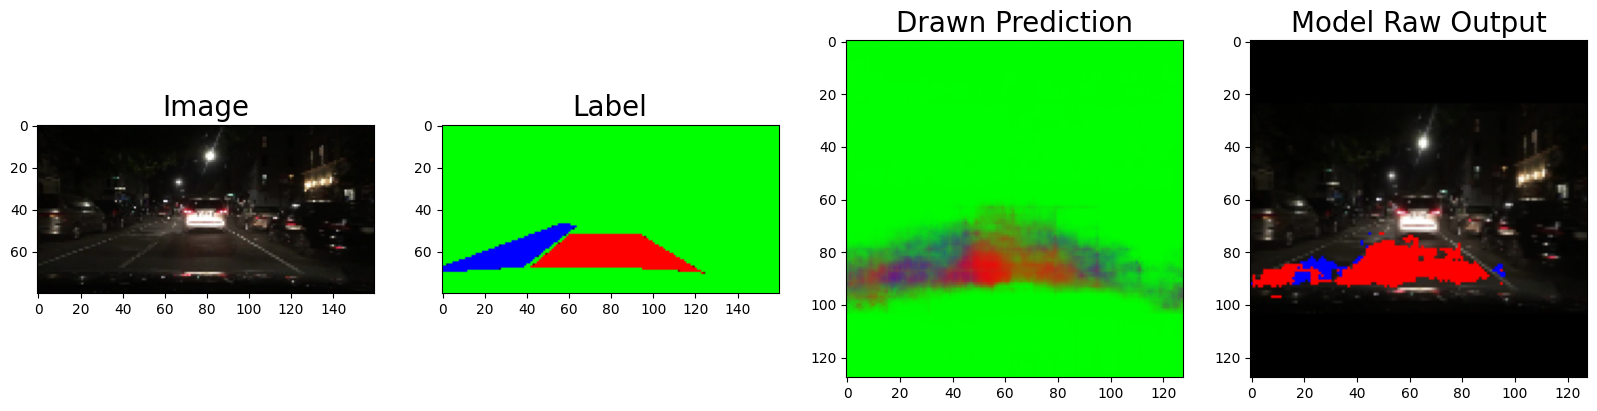

In [219]:
index = random.randint(0,len(images))
model_output, drawn_predication = run(images[index])

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.imshow(images[index])
ax1.set_title('Image', fontsize=20)
ax2.imshow(labels[index])
ax2.set_title('Label', fontsize=20)
ax3.imshow(model_output)
ax4.set_title("Model Raw Output", fontsize=20)
ax4.imshow(drawn_predication)
ax3.set_title("Drawn Prediction", fontsize=20)

In [188]:
from moviepy.editor import VideoFileClip
video_file = "dataset/videos/project_video.mp4"
clip = VideoFileClip(video_file).subclip(0,30).set_fps(15)
white_clip = clip.fl_image(run2)
%time white_clip.write_videofile("output.mp4",audio=False)

1/1 [==============================] - 0s 24ms/step
Moviepy - Building video output.mp4.
Moviepy - Writing video output.mp4



t:   0%|          | 0/450 [00:00<?, ?it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:   0%|          | 2/450 [00:00<00:26, 17.08it/s, now=None]

1/1 [==============================] - 0s 15ms/step


t:   1%|          | 4/450 [00:00<00:42, 10.42it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   1%|▏         | 6/450 [00:00<00:45,  9.74it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:   2%|▏         | 8/450 [00:00<00:46,  9.56it/s, now=None]

1/1 [==============================] - 0s 16ms/step


t:   2%|▏         | 10/450 [00:01<00:45,  9.57it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   2%|▏         | 11/450 [00:01<00:47,  9.33it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:   3%|▎         | 12/450 [00:01<00:47,  9.26it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   3%|▎         | 13/450 [00:01<00:48,  9.04it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   3%|▎         | 14/450 [00:01<00:48,  9.04it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:   3%|▎         | 15/450 [00:01<00:47,  9.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   4%|▎         | 16/450 [00:01<00:46,  9.27it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:   4%|▍         | 17/450 [00:01<00:46,  9.31it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   4%|▍         | 18/450 [00:01<00:46,  9.25it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   4%|▍         | 19/450 [00:01<00:45,  9.40it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:   4%|▍         | 20/450 [00:02<00:46,  9.27it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:   5%|▍         | 21/450 [00:02<00:47,  9.05it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   5%|▍         | 22/450 [00:02<00:47,  8.92it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:   5%|▌         | 23/450 [00:02<00:47,  9.05it/s, now=None]

1/1 [==============================] - 0s 13ms/step


t:   6%|▌         | 25/450 [00:02<00:46,  9.14it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   6%|▌         | 26/450 [00:02<00:46,  9.06it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:   6%|▌         | 27/450 [00:02<00:46,  9.18it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:   6%|▌         | 28/450 [00:02<00:45,  9.25it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   6%|▋         | 29/450 [00:03<00:45,  9.32it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:   7%|▋         | 30/450 [00:03<00:44,  9.37it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:   7%|▋         | 31/450 [00:03<00:49,  8.47it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:   7%|▋         | 32/450 [00:03<00:48,  8.56it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   7%|▋         | 33/450 [00:03<00:47,  8.86it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:   8%|▊         | 34/450 [00:03<00:46,  9.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   8%|▊         | 35/450 [00:03<00:46,  8.94it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:   8%|▊         | 36/450 [00:03<00:48,  8.54it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:   8%|▊         | 37/450 [00:04<00:48,  8.48it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   8%|▊         | 38/450 [00:04<00:48,  8.57it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   9%|▊         | 39/450 [00:04<00:46,  8.85it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:   9%|▉         | 40/450 [00:04<00:45,  8.97it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:   9%|▉         | 41/450 [00:04<00:46,  8.88it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:   9%|▉         | 42/450 [00:04<00:45,  9.03it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  10%|▉         | 43/450 [00:04<00:45,  8.89it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  10%|▉         | 44/450 [00:04<00:46,  8.80it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  10%|█         | 45/450 [00:04<00:45,  8.91it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  10%|█         | 46/450 [00:05<00:46,  8.74it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  10%|█         | 47/450 [00:05<00:45,  8.92it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  11%|█         | 48/450 [00:05<00:45,  8.84it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  11%|█         | 49/450 [00:05<00:44,  9.00it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  11%|█         | 50/450 [00:05<00:44,  8.92it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  11%|█▏        | 51/450 [00:05<00:44,  9.05it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  12%|█▏        | 52/450 [00:05<00:43,  9.05it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  12%|█▏        | 53/450 [00:05<00:43,  9.16it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  12%|█▏        | 54/450 [00:05<00:42,  9.38it/s, now=None]

1/1 [==============================] - 0s 11ms/step


t:  12%|█▏        | 55/450 [00:06<00:41,  9.48it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  12%|█▏        | 56/450 [00:06<00:43,  9.13it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  13%|█▎        | 57/450 [00:06<00:42,  9.17it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  13%|█▎        | 58/450 [00:06<00:42,  9.25it/s, now=None]

1/1 [==============================] - 0s 15ms/step


t:  13%|█▎        | 59/450 [00:06<00:41,  9.34it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  13%|█▎        | 60/450 [00:06<00:42,  9.13it/s, now=None]

1/1 [==============================] - 0s 17ms/step


t:  14%|█▎        | 61/450 [00:06<00:42,  9.17it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  14%|█▍        | 62/450 [00:06<00:42,  9.10it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  14%|█▍        | 63/450 [00:06<00:41,  9.27it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  14%|█▍        | 64/450 [00:07<00:43,  8.90it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  14%|█▍        | 65/450 [00:07<00:42,  9.04it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  15%|█▍        | 66/450 [00:07<00:41,  9.23it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  15%|█▍        | 67/450 [00:07<00:43,  8.73it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  15%|█▌        | 68/450 [00:07<00:43,  8.85it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  15%|█▌        | 69/450 [00:07<00:42,  9.01it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  16%|█▌        | 70/450 [00:07<00:42,  8.92it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  16%|█▌        | 71/450 [00:07<00:43,  8.77it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  16%|█▌        | 72/450 [00:07<00:41,  9.08it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  16%|█▌        | 73/450 [00:08<00:41,  9.02it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  16%|█▋        | 74/450 [00:08<00:41,  9.03it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  17%|█▋        | 75/450 [00:08<00:40,  9.17it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  17%|█▋        | 76/450 [00:08<00:42,  8.87it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  17%|█▋        | 77/450 [00:08<00:42,  8.80it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  17%|█▋        | 78/450 [00:08<00:42,  8.80it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  18%|█▊        | 79/450 [00:08<00:42,  8.78it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  18%|█▊        | 80/450 [00:08<00:41,  8.85it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  18%|█▊        | 81/450 [00:08<00:41,  8.81it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  18%|█▊        | 82/450 [00:09<00:42,  8.75it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  18%|█▊        | 83/450 [00:09<00:42,  8.68it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  19%|█▊        | 84/450 [00:09<00:40,  8.97it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  19%|█▉        | 85/450 [00:09<00:44,  8.27it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  19%|█▉        | 86/450 [00:09<00:44,  8.19it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  19%|█▉        | 87/450 [00:09<00:45,  8.05it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  20%|█▉        | 88/450 [00:09<00:44,  8.14it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  20%|█▉        | 89/450 [00:09<00:44,  8.06it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  20%|██        | 90/450 [00:10<00:44,  8.14it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  20%|██        | 91/450 [00:10<00:44,  8.12it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  20%|██        | 92/450 [00:10<00:45,  7.91it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  21%|██        | 93/450 [00:10<00:42,  8.37it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  21%|██        | 94/450 [00:10<00:42,  8.44it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  21%|██        | 95/450 [00:10<00:41,  8.48it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  21%|██▏       | 96/450 [00:10<00:40,  8.69it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  22%|██▏       | 97/450 [00:10<00:40,  8.63it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  22%|██▏       | 98/450 [00:10<00:43,  8.07it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  22%|██▏       | 99/450 [00:11<00:42,  8.33it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  22%|██▏       | 100/450 [00:11<00:44,  7.79it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  22%|██▏       | 101/450 [00:11<00:46,  7.55it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  23%|██▎       | 102/450 [00:11<00:45,  7.63it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  23%|██▎       | 103/450 [00:11<00:48,  7.18it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  23%|██▎       | 104/450 [00:11<00:46,  7.42it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  23%|██▎       | 105/450 [00:11<00:46,  7.39it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  24%|██▎       | 106/450 [00:12<00:48,  7.16it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  24%|██▍       | 107/450 [00:12<00:46,  7.45it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  24%|██▍       | 108/450 [00:12<00:43,  7.85it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  24%|██▍       | 109/450 [00:12<00:42,  7.97it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  24%|██▍       | 110/450 [00:12<00:41,  8.13it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  25%|██▍       | 111/450 [00:12<00:40,  8.41it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  25%|██▍       | 112/450 [00:12<00:39,  8.59it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  25%|██▌       | 113/450 [00:12<00:38,  8.85it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  25%|██▌       | 114/450 [00:12<00:37,  8.98it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  26%|██▌       | 115/450 [00:13<00:37,  8.91it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  26%|██▌       | 116/450 [00:13<00:36,  9.07it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  26%|██▌       | 117/450 [00:13<00:37,  8.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  26%|██▌       | 118/450 [00:13<00:37,  8.90it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  26%|██▋       | 119/450 [00:13<00:36,  9.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  27%|██▋       | 120/450 [00:13<00:35,  9.27it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  27%|██▋       | 121/450 [00:13<00:35,  9.35it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  27%|██▋       | 122/450 [00:13<00:35,  9.26it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  27%|██▋       | 123/450 [00:13<00:35,  9.25it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  28%|██▊       | 124/450 [00:14<00:35,  9.26it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  28%|██▊       | 125/450 [00:14<00:35,  9.25it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  28%|██▊       | 127/450 [00:14<00:33,  9.59it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  28%|██▊       | 128/450 [00:14<00:34,  9.38it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  29%|██▊       | 129/450 [00:14<00:35,  9.03it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  29%|██▉       | 130/450 [00:14<00:34,  9.25it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▉       | 131/450 [00:14<00:35,  9.03it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  30%|██▉       | 133/450 [00:15<00:33,  9.50it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  30%|██▉       | 134/450 [00:15<00:33,  9.45it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  30%|███       | 135/450 [00:15<00:33,  9.30it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  30%|███       | 136/450 [00:15<00:36,  8.69it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  30%|███       | 137/450 [00:15<00:36,  8.48it/s, now=None]

1/1 [==============================] - 0s 16ms/step


t:  31%|███       | 138/450 [00:15<00:37,  8.25it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  31%|███       | 139/450 [00:15<00:37,  8.21it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  31%|███       | 140/450 [00:15<00:39,  7.91it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  31%|███▏      | 141/450 [00:16<00:39,  7.91it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  32%|███▏      | 142/450 [00:16<00:39,  7.88it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  32%|███▏      | 143/450 [00:16<00:40,  7.66it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  32%|███▏      | 144/450 [00:16<00:39,  7.69it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  32%|███▏      | 145/450 [00:16<00:40,  7.50it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  32%|███▏      | 146/450 [00:16<00:41,  7.36it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  33%|███▎      | 147/450 [00:16<00:41,  7.25it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  33%|███▎      | 148/450 [00:16<00:42,  7.10it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  33%|███▎      | 149/450 [00:17<00:41,  7.32it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  33%|███▎      | 150/450 [00:17<00:41,  7.24it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  34%|███▎      | 151/450 [00:17<00:40,  7.36it/s, now=None]

1/1 [==============================] - 0s 16ms/step


t:  34%|███▍      | 152/450 [00:17<00:39,  7.45it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  34%|███▍      | 153/450 [00:17<00:38,  7.71it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  34%|███▍      | 154/450 [00:17<00:38,  7.65it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  34%|███▍      | 155/450 [00:17<00:38,  7.59it/s, now=None]

1/1 [==============================] - 0s 16ms/step


t:  35%|███▍      | 156/450 [00:18<00:39,  7.40it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  35%|███▍      | 157/450 [00:18<00:40,  7.30it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  35%|███▌      | 158/450 [00:18<00:39,  7.39it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  35%|███▌      | 159/450 [00:18<00:39,  7.36it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  36%|███▌      | 160/450 [00:18<00:40,  7.20it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  36%|███▌      | 161/450 [00:18<00:41,  6.99it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  36%|███▌      | 162/450 [00:18<00:40,  7.15it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  36%|███▌      | 163/450 [00:19<00:40,  7.17it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  36%|███▋      | 164/450 [00:19<00:41,  6.95it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  37%|███▋      | 165/450 [00:19<00:39,  7.13it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  37%|███▋      | 166/450 [00:19<00:40,  7.09it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  37%|███▋      | 167/450 [00:19<00:38,  7.32it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  37%|███▋      | 168/450 [00:19<00:38,  7.23it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  38%|███▊      | 169/450 [00:19<00:39,  7.13it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  38%|███▊      | 170/450 [00:20<00:39,  7.08it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  38%|███▊      | 171/450 [00:20<00:39,  7.09it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  38%|███▊      | 172/450 [00:20<00:39,  7.07it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  38%|███▊      | 173/450 [00:20<00:40,  6.80it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  39%|███▊      | 174/450 [00:20<00:40,  6.88it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  39%|███▉      | 175/450 [00:20<00:39,  6.90it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  39%|███▉      | 176/450 [00:20<00:39,  6.96it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  39%|███▉      | 177/450 [00:21<00:40,  6.81it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  40%|███▉      | 178/450 [00:21<00:38,  7.05it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  40%|███▉      | 179/450 [00:21<00:38,  6.96it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  40%|████      | 180/450 [00:21<00:37,  7.23it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  40%|████      | 181/450 [00:21<00:38,  7.05it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  40%|████      | 182/450 [00:21<00:38,  6.94it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  41%|████      | 183/450 [00:21<00:37,  7.07it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  41%|████      | 184/450 [00:22<00:36,  7.23it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  41%|████      | 185/450 [00:22<00:36,  7.26it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  41%|████▏     | 186/450 [00:22<00:36,  7.19it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  42%|████▏     | 187/450 [00:22<00:36,  7.30it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  42%|████▏     | 188/450 [00:22<00:35,  7.47it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  42%|████▏     | 189/450 [00:22<00:35,  7.32it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  42%|████▏     | 190/450 [00:22<00:36,  7.12it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  42%|████▏     | 191/450 [00:22<00:35,  7.23it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  43%|████▎     | 192/450 [00:23<00:35,  7.17it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  43%|████▎     | 193/450 [00:23<00:36,  7.13it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  43%|████▎     | 194/450 [00:23<00:39,  6.44it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  43%|████▎     | 195/450 [00:23<00:38,  6.60it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  44%|████▎     | 196/450 [00:23<00:38,  6.68it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  44%|████▍     | 197/450 [00:23<00:38,  6.64it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  44%|████▍     | 198/450 [00:24<00:36,  6.81it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  44%|████▍     | 199/450 [00:24<00:35,  7.10it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  44%|████▍     | 200/450 [00:24<00:37,  6.74it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  45%|████▍     | 201/450 [00:24<00:34,  7.21it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  45%|████▍     | 202/450 [00:24<00:35,  7.01it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  45%|████▌     | 203/450 [00:24<00:34,  7.18it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  45%|████▌     | 204/450 [00:24<00:34,  7.06it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  46%|████▌     | 205/450 [00:25<00:34,  7.01it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  46%|████▌     | 206/450 [00:25<00:34,  7.05it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  46%|████▌     | 207/450 [00:25<00:33,  7.18it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  46%|████▌     | 208/450 [00:25<00:33,  7.12it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  46%|████▋     | 209/450 [00:25<00:34,  7.08it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  47%|████▋     | 210/450 [00:25<00:34,  7.03it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  47%|████▋     | 211/450 [00:25<00:34,  6.97it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  47%|████▋     | 212/450 [00:26<00:34,  6.97it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  47%|████▋     | 213/450 [00:26<00:33,  7.14it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  48%|████▊     | 214/450 [00:26<00:32,  7.21it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  48%|████▊     | 215/450 [00:26<00:32,  7.23it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  48%|████▊     | 216/450 [00:26<00:32,  7.28it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  48%|████▊     | 217/450 [00:26<00:31,  7.42it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  48%|████▊     | 218/450 [00:26<00:33,  6.96it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  49%|████▊     | 219/450 [00:26<00:32,  7.01it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  49%|████▉     | 220/450 [00:27<00:32,  7.00it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  49%|████▉     | 221/450 [00:27<00:32,  6.97it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  49%|████▉     | 222/450 [00:27<00:32,  7.02it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  50%|████▉     | 223/450 [00:27<00:32,  6.95it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  50%|████▉     | 224/450 [00:27<00:32,  7.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|█████     | 225/450 [00:27<00:32,  7.01it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  50%|█████     | 226/450 [00:27<00:31,  7.01it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  50%|█████     | 227/450 [00:28<00:32,  6.81it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  51%|█████     | 228/450 [00:28<00:32,  6.88it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  51%|█████     | 229/450 [00:28<00:33,  6.59it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  51%|█████     | 230/450 [00:28<00:32,  6.75it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  51%|█████▏    | 231/450 [00:28<00:31,  6.97it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  52%|█████▏    | 232/450 [00:28<00:31,  6.87it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  52%|█████▏    | 233/450 [00:29<00:31,  6.91it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  52%|█████▏    | 234/450 [00:29<00:31,  6.88it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  52%|█████▏    | 235/450 [00:29<00:31,  6.90it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  52%|█████▏    | 236/450 [00:29<00:30,  7.01it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  53%|█████▎    | 237/450 [00:29<00:30,  7.02it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  53%|█████▎    | 238/450 [00:29<00:30,  6.96it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  53%|█████▎    | 239/450 [00:29<00:30,  6.99it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  53%|█████▎    | 240/450 [00:30<00:29,  7.03it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  54%|█████▎    | 241/450 [00:30<00:29,  7.10it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  54%|█████▍    | 242/450 [00:30<00:30,  6.91it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  54%|█████▍    | 243/450 [00:30<00:30,  6.80it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  54%|█████▍    | 244/450 [00:30<00:29,  6.87it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  54%|█████▍    | 245/450 [00:30<00:30,  6.83it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  55%|█████▍    | 246/450 [00:30<00:28,  7.06it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  55%|█████▍    | 247/450 [00:31<00:29,  7.00it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  55%|█████▌    | 248/450 [00:31<00:29,  6.77it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  55%|█████▌    | 249/450 [00:31<00:31,  6.48it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  56%|█████▌    | 250/450 [00:31<00:30,  6.51it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  56%|█████▌    | 251/450 [00:31<00:29,  6.69it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  56%|█████▌    | 252/450 [00:31<00:30,  6.42it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  56%|█████▌    | 253/450 [00:31<00:30,  6.47it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  56%|█████▋    | 254/450 [00:32<00:30,  6.53it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  57%|█████▋    | 255/450 [00:32<00:29,  6.66it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  57%|█████▋    | 256/450 [00:32<00:30,  6.36it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  57%|█████▋    | 257/450 [00:32<00:30,  6.43it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  57%|█████▋    | 258/450 [00:32<00:29,  6.43it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  58%|█████▊    | 259/450 [00:32<00:29,  6.57it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  58%|█████▊    | 260/450 [00:33<00:28,  6.75it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  58%|█████▊    | 261/450 [00:33<00:26,  7.07it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  58%|█████▊    | 262/450 [00:33<00:28,  6.61it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  58%|█████▊    | 263/450 [00:33<00:28,  6.63it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  59%|█████▊    | 264/450 [00:33<00:27,  6.68it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  59%|█████▉    | 265/450 [00:33<00:28,  6.57it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  59%|█████▉    | 266/450 [00:33<00:30,  6.10it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  59%|█████▉    | 267/450 [00:34<00:28,  6.31it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  60%|█████▉    | 268/450 [00:34<00:27,  6.56it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  60%|█████▉    | 269/450 [00:34<00:27,  6.66it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  60%|██████    | 270/450 [00:34<00:26,  6.71it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  60%|██████    | 271/450 [00:34<00:28,  6.29it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  60%|██████    | 272/450 [00:34<00:29,  6.03it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  61%|██████    | 273/450 [00:35<00:28,  6.31it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  61%|██████    | 274/450 [00:35<00:27,  6.39it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  61%|██████    | 275/450 [00:35<00:27,  6.40it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  61%|██████▏   | 276/450 [00:35<00:26,  6.55it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  62%|██████▏   | 277/450 [00:35<00:26,  6.65it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  62%|██████▏   | 278/450 [00:35<00:25,  6.74it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  62%|██████▏   | 279/450 [00:35<00:25,  6.69it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  62%|██████▏   | 280/450 [00:36<00:25,  6.66it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  62%|██████▏   | 281/450 [00:36<00:25,  6.76it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  63%|██████▎   | 282/450 [00:36<00:24,  6.94it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  63%|██████▎   | 283/450 [00:36<00:24,  6.85it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  63%|██████▎   | 284/450 [00:36<00:24,  6.91it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  63%|██████▎   | 285/450 [00:36<00:23,  7.08it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  64%|██████▎   | 286/450 [00:36<00:23,  6.86it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  64%|██████▍   | 287/450 [00:37<00:24,  6.73it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  64%|██████▍   | 288/450 [00:37<00:24,  6.61it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  64%|██████▍   | 289/450 [00:37<00:24,  6.63it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  64%|██████▍   | 290/450 [00:37<00:23,  6.74it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  65%|██████▍   | 291/450 [00:37<00:23,  6.89it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  65%|██████▍   | 292/450 [00:37<00:22,  6.90it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  65%|██████▌   | 293/450 [00:38<00:23,  6.56it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  65%|██████▌   | 294/450 [00:38<00:24,  6.48it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  66%|██████▌   | 295/450 [00:38<00:23,  6.72it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  66%|██████▌   | 296/450 [00:38<00:23,  6.66it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  66%|██████▌   | 297/450 [00:38<00:22,  6.90it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  66%|██████▌   | 298/450 [00:38<00:21,  7.09it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  66%|██████▋   | 299/450 [00:38<00:20,  7.26it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  67%|██████▋   | 300/450 [00:38<00:20,  7.23it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  67%|██████▋   | 301/450 [00:39<00:20,  7.31it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  67%|██████▋   | 302/450 [00:39<00:19,  7.47it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  67%|██████▋   | 303/450 [00:39<00:19,  7.50it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  68%|██████▊   | 304/450 [00:39<00:19,  7.42it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  68%|██████▊   | 305/450 [00:39<00:19,  7.42it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  68%|██████▊   | 306/450 [00:39<00:18,  7.67it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  68%|██████▊   | 307/450 [00:39<00:18,  7.53it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  68%|██████▊   | 308/450 [00:40<00:19,  7.42it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  69%|██████▊   | 309/450 [00:40<00:18,  7.50it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  69%|██████▉   | 310/450 [00:40<00:19,  7.27it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  69%|██████▉   | 311/450 [00:40<00:19,  7.31it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  69%|██████▉   | 312/450 [00:40<00:18,  7.42it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  70%|██████▉   | 313/450 [00:40<00:18,  7.34it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  70%|██████▉   | 314/450 [00:40<00:18,  7.30it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  70%|███████   | 315/450 [00:41<00:18,  7.27it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  70%|███████   | 316/450 [00:41<00:18,  7.13it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  70%|███████   | 317/450 [00:41<00:18,  7.17it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  71%|███████   | 318/450 [00:41<00:17,  7.35it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  71%|███████   | 319/450 [00:41<00:17,  7.37it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  71%|███████   | 320/450 [00:41<00:17,  7.46it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  71%|███████▏  | 321/450 [00:41<00:17,  7.43it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  72%|███████▏  | 322/450 [00:41<00:17,  7.27it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  72%|███████▏  | 323/450 [00:42<00:17,  7.12it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  72%|███████▏  | 324/450 [00:42<00:17,  7.09it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  72%|███████▏  | 325/450 [00:42<00:17,  6.95it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  72%|███████▏  | 326/450 [00:42<00:18,  6.56it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  73%|███████▎  | 327/450 [00:42<00:18,  6.68it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  73%|███████▎  | 328/450 [00:42<00:18,  6.63it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  73%|███████▎  | 329/450 [00:43<00:18,  6.64it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  73%|███████▎  | 330/450 [00:43<00:18,  6.64it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  74%|███████▎  | 331/450 [00:43<00:18,  6.52it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  74%|███████▍  | 332/450 [00:43<00:17,  6.70it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  74%|███████▍  | 333/450 [00:43<00:17,  6.87it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  74%|███████▍  | 334/450 [00:43<00:16,  7.04it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  74%|███████▍  | 335/450 [00:43<00:16,  6.82it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  75%|███████▍  | 336/450 [00:44<00:16,  6.82it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  75%|███████▍  | 337/450 [00:44<00:16,  6.91it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  75%|███████▌  | 338/450 [00:44<00:16,  6.82it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  75%|███████▌  | 339/450 [00:44<00:16,  6.85it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  76%|███████▌  | 340/450 [00:44<00:15,  6.96it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  76%|███████▌  | 341/450 [00:44<00:15,  6.93it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  76%|███████▌  | 342/450 [00:44<00:15,  7.01it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  76%|███████▌  | 343/450 [00:45<00:15,  6.91it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  76%|███████▋  | 344/450 [00:45<00:15,  6.91it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  77%|███████▋  | 345/450 [00:45<00:15,  6.87it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  77%|███████▋  | 346/450 [00:45<00:15,  6.63it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  77%|███████▋  | 347/450 [00:45<00:14,  6.88it/s, now=None]

1/1 [==============================] - 0s 16ms/step


t:  77%|███████▋  | 348/450 [00:45<00:15,  6.72it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  78%|███████▊  | 349/450 [00:45<00:14,  7.04it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  78%|███████▊  | 350/450 [00:46<00:14,  7.08it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  78%|███████▊  | 351/450 [00:46<00:13,  7.35it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  78%|███████▊  | 352/450 [00:46<00:13,  7.37it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  78%|███████▊  | 353/450 [00:46<00:13,  7.28it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  79%|███████▊  | 354/450 [00:46<00:12,  7.42it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  79%|███████▉  | 355/450 [00:46<00:13,  7.24it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  79%|███████▉  | 356/450 [00:46<00:13,  7.20it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  79%|███████▉  | 357/450 [00:47<00:12,  7.34it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  80%|███████▉  | 358/450 [00:47<00:12,  7.43it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  80%|███████▉  | 359/450 [00:47<00:11,  7.60it/s, now=None]

1/1 [==============================] - 0s 14ms/step


t:  80%|████████  | 360/450 [00:47<00:11,  7.52it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  80%|████████  | 361/450 [00:47<00:11,  7.70it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  80%|████████  | 362/450 [00:47<00:11,  7.47it/s, now=None]

1/1 [==============================] - 0s 15ms/step


t:  81%|████████  | 363/450 [00:47<00:11,  7.69it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  81%|████████  | 364/450 [00:47<00:10,  7.88it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  81%|████████  | 365/450 [00:48<00:10,  7.84it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  81%|████████▏ | 366/450 [00:48<00:10,  7.89it/s, now=None]

1/1 [==============================] - 0s 17ms/step


t:  82%|████████▏ | 367/450 [00:48<00:10,  7.64it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  82%|████████▏ | 368/450 [00:48<00:10,  7.57it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  82%|████████▏ | 369/450 [00:48<00:10,  7.40it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  82%|████████▏ | 370/450 [00:48<00:10,  7.44it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  82%|████████▏ | 371/450 [00:48<00:11,  7.18it/s, now=None]

1/1 [==============================] - 0s 16ms/step


t:  83%|████████▎ | 372/450 [00:48<00:10,  7.54it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  83%|████████▎ | 373/450 [00:49<00:10,  7.66it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  83%|████████▎ | 374/450 [00:49<00:10,  7.25it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  83%|████████▎ | 375/450 [00:49<00:10,  7.44it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  84%|████████▎ | 376/450 [00:49<00:10,  7.19it/s, now=None]

1/1 [==============================] - 0s 14ms/step


t:  84%|████████▍ | 377/450 [00:49<00:09,  7.35it/s, now=None]

1/1 [==============================] - 0s 16ms/step


t:  84%|████████▍ | 378/450 [00:49<00:09,  7.69it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  84%|████████▍ | 379/450 [00:49<00:09,  7.71it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  84%|████████▍ | 380/450 [00:50<00:09,  7.45it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  85%|████████▍ | 381/450 [00:50<00:08,  7.81it/s, now=None]

1/1 [==============================] - 0s 16ms/step


t:  85%|████████▍ | 382/450 [00:50<00:08,  7.63it/s, now=None]

1/1 [==============================] - 0s 14ms/step


t:  85%|████████▌ | 383/450 [00:50<00:08,  7.64it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  85%|████████▌ | 384/450 [00:50<00:08,  7.80it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  86%|████████▌ | 385/450 [00:50<00:08,  7.80it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  86%|████████▌ | 386/450 [00:50<00:08,  7.47it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  86%|████████▌ | 387/450 [00:50<00:08,  7.52it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  86%|████████▌ | 388/450 [00:51<00:08,  7.51it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  86%|████████▋ | 389/450 [00:51<00:08,  7.38it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  87%|████████▋ | 390/450 [00:51<00:08,  7.45it/s, now=None]

1/1 [==============================] - 0s 11ms/step


t:  87%|████████▋ | 391/450 [00:51<00:07,  7.76it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  87%|████████▋ | 392/450 [00:51<00:07,  7.62it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  87%|████████▋ | 393/450 [00:51<00:07,  7.62it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  88%|████████▊ | 394/450 [00:51<00:07,  7.23it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  88%|████████▊ | 395/450 [00:52<00:07,  7.23it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  88%|████████▊ | 396/450 [00:52<00:07,  6.98it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  88%|████████▊ | 397/450 [00:52<00:07,  7.02it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  88%|████████▊ | 398/450 [00:52<00:07,  7.28it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  89%|████████▊ | 399/450 [00:52<00:07,  7.23it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  89%|████████▉ | 400/450 [00:52<00:06,  7.20it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  89%|████████▉ | 401/450 [00:52<00:06,  7.38it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  89%|████████▉ | 402/450 [00:53<00:06,  7.45it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  90%|████████▉ | 403/450 [00:53<00:06,  7.24it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  90%|████████▉ | 404/450 [00:53<00:06,  7.18it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  90%|█████████ | 405/450 [00:53<00:06,  7.37it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  90%|█████████ | 406/450 [00:53<00:06,  7.24it/s, now=None]

1/1 [==============================] - 0s 17ms/step


t:  90%|█████████ | 407/450 [00:53<00:05,  7.46it/s, now=None]

1/1 [==============================] - 0s 16ms/step


t:  91%|█████████ | 408/450 [00:53<00:05,  7.47it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  91%|█████████ | 409/450 [00:53<00:05,  7.46it/s, now=None]

1/1 [==============================] - 0s 16ms/step


t:  91%|█████████ | 410/450 [00:54<00:05,  7.81it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  91%|█████████▏| 411/450 [00:54<00:05,  7.54it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  92%|█████████▏| 412/450 [00:54<00:05,  7.51it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  92%|█████████▏| 413/450 [00:54<00:04,  7.62it/s, now=None]

1/1 [==============================] - 0s 16ms/step


t:  92%|█████████▏| 414/450 [00:54<00:04,  7.63it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  92%|█████████▏| 415/450 [00:54<00:04,  7.51it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  92%|█████████▏| 416/450 [00:54<00:04,  7.27it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  93%|█████████▎| 417/450 [00:55<00:04,  7.59it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  93%|█████████▎| 418/450 [00:55<00:04,  7.62it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  93%|█████████▎| 419/450 [00:55<00:04,  7.74it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  93%|█████████▎| 420/450 [00:55<00:03,  7.59it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  94%|█████████▎| 421/450 [00:55<00:03,  7.54it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  94%|█████████▍| 422/450 [00:55<00:03,  7.28it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  94%|█████████▍| 423/450 [00:55<00:03,  7.39it/s, now=None]

1/1 [==============================] - 0s 15ms/step


t:  94%|█████████▍| 424/450 [00:55<00:03,  7.36it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  94%|█████████▍| 425/450 [00:56<00:03,  7.64it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  95%|█████████▍| 426/450 [00:56<00:03,  7.71it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  95%|█████████▍| 427/450 [00:56<00:03,  7.56it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  95%|█████████▌| 428/450 [00:56<00:03,  7.25it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  95%|█████████▌| 429/450 [00:56<00:02,  7.45it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  96%|█████████▌| 430/450 [00:56<00:02,  7.32it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  96%|█████████▌| 431/450 [00:56<00:02,  7.12it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  96%|█████████▌| 432/450 [00:57<00:02,  7.50it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  96%|█████████▌| 433/450 [00:57<00:02,  7.64it/s, now=None]

1/1 [==============================] - 0s 11ms/step


t:  96%|█████████▋| 434/450 [00:57<00:02,  7.57it/s, now=None]

1/1 [==============================] - 0s 15ms/step


t:  97%|█████████▋| 435/450 [00:57<00:01,  7.67it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  97%|█████████▋| 436/450 [00:57<00:01,  7.78it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  97%|█████████▋| 437/450 [00:57<00:01,  7.98it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  97%|█████████▋| 438/450 [00:57<00:01,  7.92it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  98%|█████████▊| 439/450 [00:57<00:01,  7.79it/s, now=None]

1/1 [==============================] - 0s 15ms/step


t:  98%|█████████▊| 440/450 [00:58<00:01,  7.89it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  98%|█████████▊| 441/450 [00:58<00:01,  7.98it/s, now=None]

1/1 [==============================] - 0s 17ms/step


t:  98%|█████████▊| 442/450 [00:58<00:01,  7.84it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  98%|█████████▊| 443/450 [00:58<00:00,  7.87it/s, now=None]

1/1 [==============================] - 0s 12ms/step


t:  99%|█████████▊| 444/450 [00:58<00:00,  7.71it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  99%|█████████▉| 445/450 [00:58<00:00,  7.24it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  99%|█████████▉| 446/450 [00:58<00:00,  7.46it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  99%|█████████▉| 447/450 [00:58<00:00,  7.59it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t: 100%|█████████▉| 448/450 [00:59<00:00,  7.38it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t: 100%|█████████▉| 449/450 [00:59<00:00,  7.40it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t: 100%|██████████| 450/450 [00:59<00:00,  7.61it/s, now=None]

1/1 [==============================] - 0s 34ms/step


Moviepy - Done !
Moviepy - video ready output.mp4
CPU times: total: 13.2 s
Wall time: 1min


### Infer On Video

In [14]:
cap = cv2.VideoCapture('project_video.mp4')
out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (160,80))

# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
  # Read until video is completed
  while(cap.isOpened()):
      # Capture frame-by-frame
      ret, frame = cap.read()
      print("frame.shape : ", frame.shape)
      if ret == True:
        out_frame = run2(frame)
        # Write the frame into the file 'output.avi'
        out.write(out_frame)
else:
   print("Video did not open")


# When everything done, release the video capture and video write objects
cap.release()
out.release()

Video did not open
